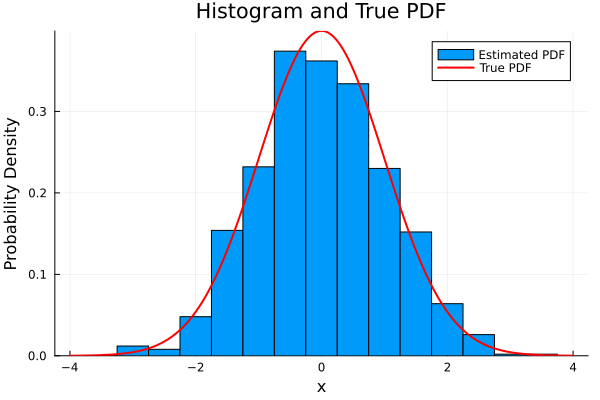

In [2]:
using Random
using Plots

Random.seed!(0)  # Set a seed for reproducibility
x = randn(1000)

bincenters = -3.5:0.5:3.5
bins = length(bincenters)
h = zeros(bins)

for i in 1:length(x)
    for k in 1:bins
        if bincenters[k] - 0.5/2 < x[i] <= bincenters[k] + 0.5/2
            h[k] += 1
        end
    end
end

pxest = h / (1000 * 0.5)

xaxis = -4:0.01:4
px = (1 / sqrt(2 * π)) * exp.(-0.5 * xaxis.^2)

# Plot the results
bar(bincenters, pxest, bar_width=0.5, label="Estimated PDF")
plot!(xaxis, px, label="True PDF", linewidth=2, color=:red)
xlabel!("x")
ylabel!("Probability Density")
title!("Histogram and True PDF")
# legend!(:topright)


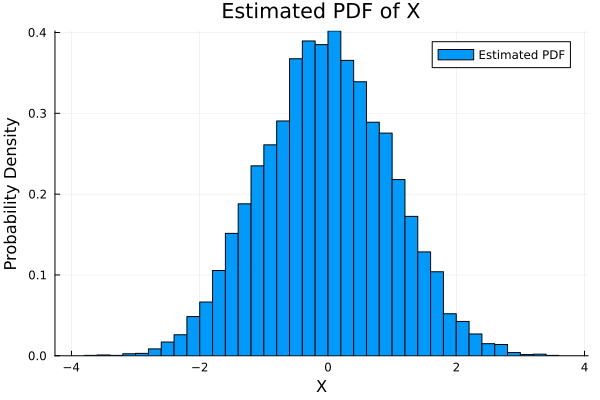

In [3]:
using Random
using Plots

function generate_sample()
    return sum(rand() - 0.5 for _ in 1:12)
end

num_samples = 10000

# Generate samples
samples = [generate_sample() for _ in 1:num_samples]

# Estimate PDF using histogram
histogram_result = histogram(samples, nbins=50, normalize=true, label="Estimated PDF")

# Plot the results
plot(histogram_result, xlabel="X", ylabel="Probability Density", title="Estimated PDF of X")


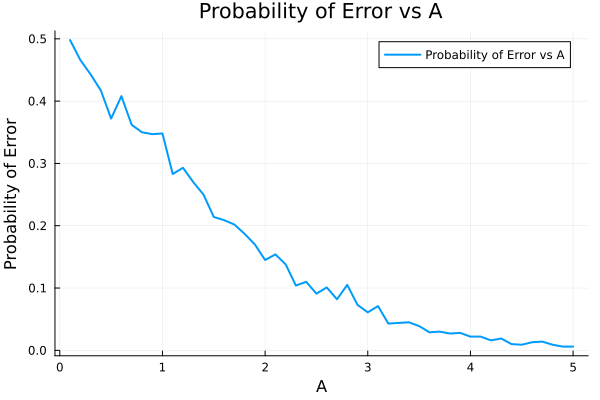

In [6]:
using Plots

A = 0.1:0.1:5
Pₑ = zeros(length(A))

for k in 1:length(A)
    error = 0
    for i in 1:1000
        w = randn()
        if A[k]/2 + w <= 0
            error += 1
        end
    end
    Pₑ[k] = error / 1000
end

# Plot the results
plot(A, Pₑ, xlabel="A", ylabel="Probability of Error", label="Probability of Error vs A", linewidth=2)
title!("Probability of Error vs A")
